In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount("/content/gdrive")

PATH = "/content/gdrive/My Drive/Datasets/FDS"

Mounted at /content/gdrive


In [ ]:
def show(image):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

def showpair(image1, image2):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image1, cmap="gray")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(image2, cmap="gray")
    plt.axis("off")
    plt.show()
    
def preprocess(image):
    return cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)

def clahe_(image):
    clahe = cv2.createCLAHE(2, (2, 2))
    for i in range(3):
        image[:, :, i] = clahe.apply(image[:, :, i])
    return image

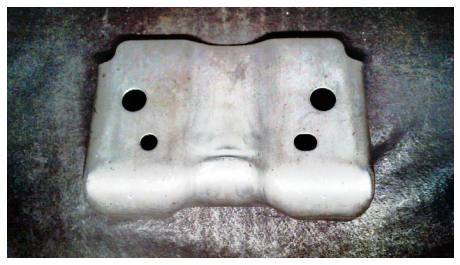

In [ ]:
image = clahe_(preprocess(cv2.imread(os.path.join(PATH, "Part 2/Positive/Snapshot_1.png"), cv2.IMREAD_COLOR)))
show(image)

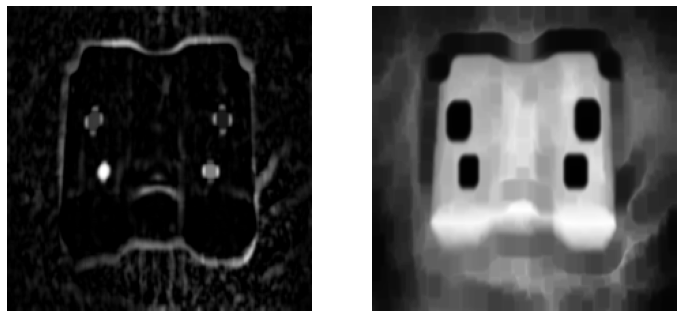

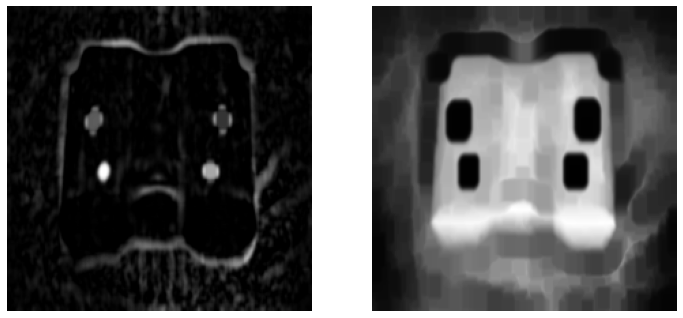

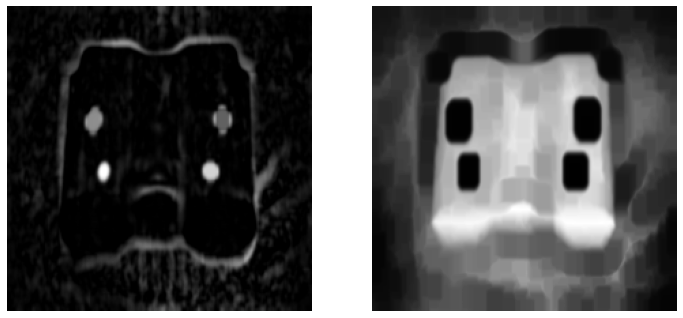

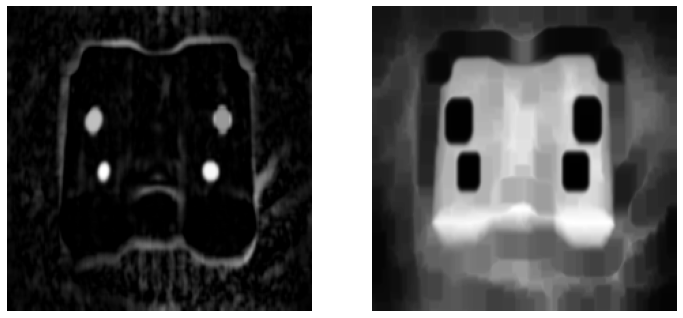

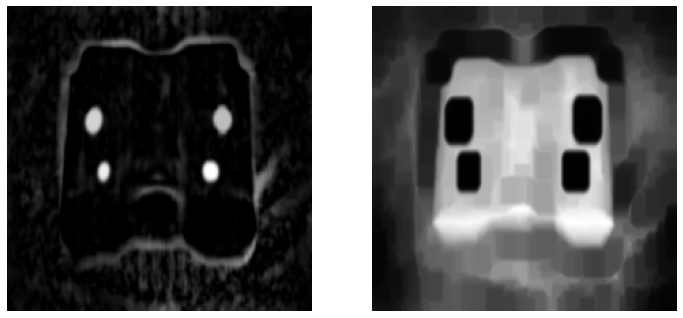

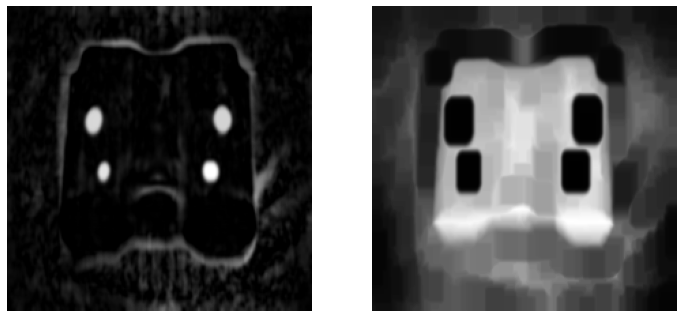

In [ ]:
# kernels = [5, 11, 13, 15, 17, 19, 21, 23, 25]
kernels = [19, 21, 23, 25, 27, 29]

for kernel in kernels:
    # cimage = cv2.resize(src=cv2.morphologyEx(src=image, op=cv2.MORPH_CLOSE, kernel=np.ones((kernel, kernel))), dsize=(224, 224), interpolation=cv2.INTER_AREA)
    # cimage = cv2.resize(src=cv2.morphologyEx(src=image, op=cv2.MORPH_OPEN, kernel=np.ones((kernel, kernel))), dsize=(224, 224), interpolation=cv2.INTER_AREA)
    # cimage = cv2.resize(src=cv2.morphologyEx(src=image, op=cv2.MORPH_GRADIENT, kernel=np.ones((kernel, kernel))), dsize=(224, 224), interpolation=cv2.INTER_AREA)
    # cimage = cv2.resize(src=cv2.morphologyEx(src=image, op=cv2.MORPH_TOPHAT, kernel=np.ones((kernel, kernel))), dsize=(224, 224), interpolation=cv2.INTER_AREA)

    cimage = cv2.cvtColor(src=image, code=cv2.COLOR_RGB2GRAY)
    cimage = cv2.GaussianBlur(src=cimage, ksize=(15, 15), sigmaX=0)

    cimage_1 = cv2.morphologyEx(src=cimage, op=cv2.MORPH_BLACKHAT, kernel=np.ones((kernel, kernel)))
    cimage_1 = cv2.resize(src=cimage_1, dsize=(224, 224), interpolation=cv2.INTER_AREA)

    cimage_2 = cv2.morphologyEx(src=cimage, op=cv2.MORPH_ERODE, kernel=np.ones((kernel, kernel)))
    cimage_2 = cv2.resize(src=cimage_2, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    
    showpair(cimage_1, cimage_2)

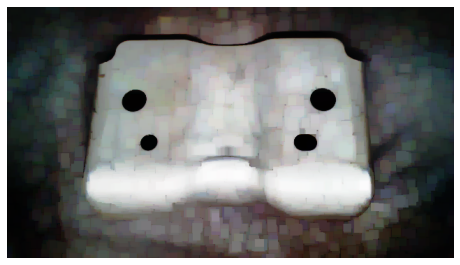

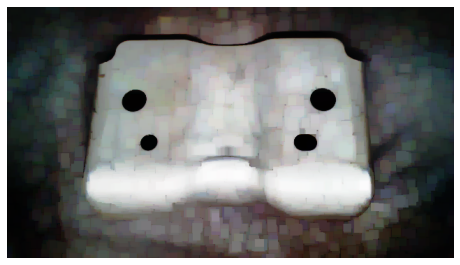

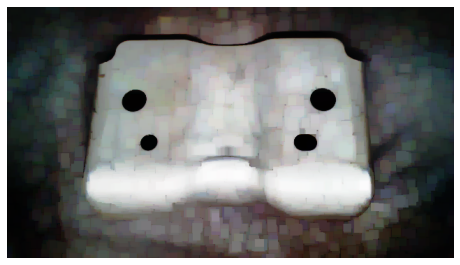

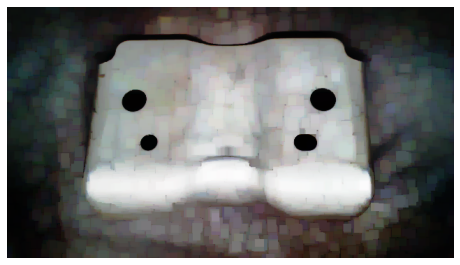

In [ ]:
def open(image, k=11):
    # n_image = image.copy()
    return cv2.morphologyEx(src=image, op=cv2.MORPH_OPEN, kernel=np.ones((k, k)))

for k in [3, 13, 23, 33]:
    show(open(image))

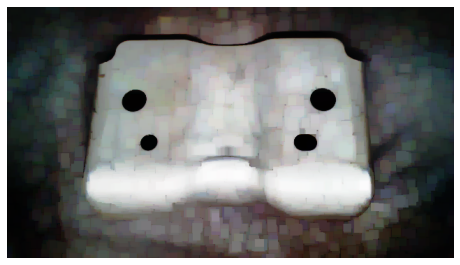

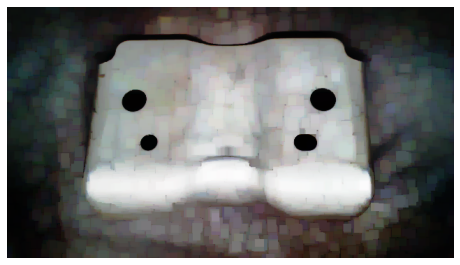

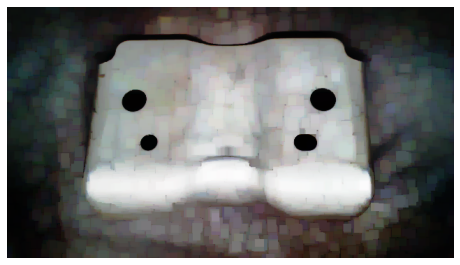

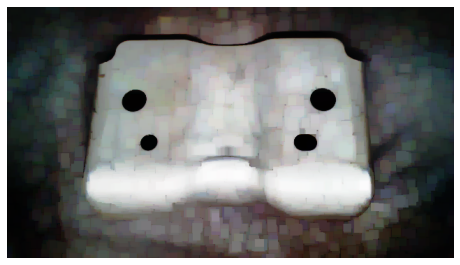

In [ ]:
def open(image, k=11):
    n_image = image.copy()
    return cv2.morphologyEx(src=n_image, op=cv2.MORPH_OPEN, kernel=np.ones((k, k)))

for k in [3, 13, 23, 33]:
    show(open(image))